In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# load the dataset
df = pd.read_csv('HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
# check for missing values
print(df.isnull().sum())

# drop any rows with missing values
df = df.dropna()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [6]:
# split the dataset into features (X) and target variable (y)
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [7]:
# normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

we can construct a regression-based artificial neural network using Keras, a high-level neural networks API. We can start with a simple model consisting of an input layer, a hidden layer with 10 nodes, and an output layer.

In [29]:
from keras.models import Sequential
from keras.layers import Dense

# define the model
model = Sequential()

model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
#10 neurons
#The input dimension of the layer is determined by the number of features in the input data (X_train).
model.add(Dense(1, activation='linear'))
"""The second layer is also a fully connected layer (Dense) with a single output neuron and 
uses the linear activation function. This is because the problem being solved is a regression 
problem where the goal is to predict a continuous output."""


# compile the model
model.compile(loss='mean_squared_error', optimizer='adam')
"""Adam is a popular optimization algorithm for deep learning models because it is computationally 
efficient and requires relatively little memory compared to other optimization algorithms. It 
is a variation of stochastic gradient descent (SGD) that maintains a running estimate of the 
first and second moments of the gradients, allowing it to adapt the learning rate for each weight 
parameter based on its gradient history. This adaptive learning rate can lead to faster convergence 
and better performance on non-convex optimization problems such as those encountered in deep learning."""


model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                140       
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [23]:
# train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)


In [24]:
# evaluate the model on the testing set
mse = model.evaluate(X_test, y_test)
print('Mean Squared Error:', mse)


3/3 [==============================] - 0s 2ms/step - loss: 54.2088
Mean Squared Error: 54.20884704589844


In [12]:
# make predictions using the trained model
X_new = [[0.03237, 0, 2.18, 0, 0.458, 6.998, 45.8, 6.0622, 3, 222, 18.7, 394.63, 2.94]]
X_new = scaler.transform(X_new)
y_new = model.predict(X_new)
print('Predicted Median Home Value:', y_new[0][0])


1/1 [==============================] - 0s 91ms/step
Predicted Median Home Value: 35.61707


C:\Users\templ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


3/3 [==============================] - 0s 9ms/step


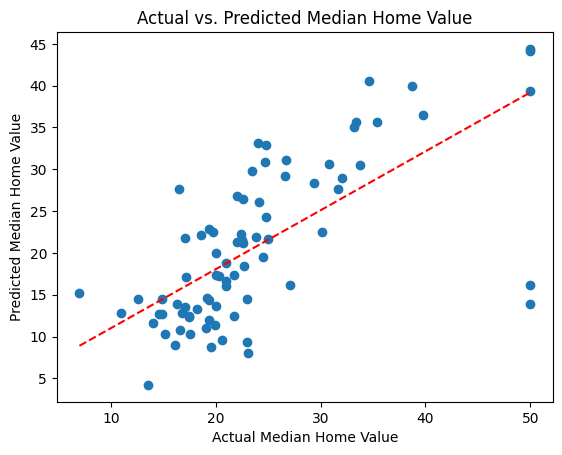

In [20]:
import matplotlib.pyplot as plt

# make predictions on the testing set
y_pred = model.predict(X_test)

# plot the actual versus predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Median Home Value')
plt.ylabel('Predicted Median Home Value')
plt.title('Actual vs. Predicted Median Home Value')

import numpy as np
p = np.polyfit(y_test, y_pred, 1)  # fit a first-degree polynomial (i.e., a straight line)
x = np.linspace(np.min(y_test), np.max(y_test), 100)  # generate 100 points evenly spaced between the min and max of y_test
y = np.polyval(p, x)  # evaluate the polynomial at the x points to get the y values
plt.plot(x, y, 'r--')  # plot the line in red with dashed style



plt.show()


In [14]:
from sklearn.metrics import r2_score

# calculate the R-squared score on the testing set
r2 = r2_score(y_test, y_pred)
print('R-squared Score:', r2)


R-squared Score: 0.24177280401340218


In [15]:
model.save("ANN.h5")